# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace.

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server.

In [1]:
%pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 22.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [2]:
%pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 29.6 MB/s eta 0:00:00


### Import Statements

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [5]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd.


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration.
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [6]:
print(f"Number of rows: {df_data.shape[0]}\nNumber of columns: {df_data.shape[1]}")

Number of rows: 962
Number of columns: 16


In [7]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [8]:
first_year = df_data['year'].head(1).iloc[0]
print(f'The first year that the Nobel prize was awarded was in {first_year}')

The first year that the Nobel prize was awarded was in 1901


In [9]:
last_year = df_data['year'].tail(1).iloc[0]
print(f'The last year of Nobel prize awards that is included in this .csv file is in {last_year}')

The last year of Nobel prize awards that is included in this .csv file is in 2020


**Challange**:
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column?
* Why do these columns have NaN values?  

### Check for Duplicates

In [10]:
df_data.duplicated().sum()

np.int64(0)

### Check for NaN Values

In [11]:
df_data.isnull().sum()

,0
year,0
category,0
prize,0
motivation,88
prize_share,0
laureate_type,0
full_name,0
birth_date,28
birth_city,31
birth_country,28


### Type Conversions

**Challenge**:
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [12]:
df_data['birth_date'] = pd.to_datetime(df_data['birth_date'])

In [13]:
df_data.sample()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
257,1950,Physics,The Nobel Prize in Physics 1950,"""for his development of the photographic metho...",1/1,Individual,Cecil Frank Powell,1903-12-05,Tonbridge,United Kingdom,United Kingdom,Male,Bristol University,Bristol,United Kingdom,GBR


In [14]:
col_subset = ['year', 'category', 'laureate_type', 'birth_date', 'full_name', 'organization_name']
df_data.loc[df_data.birth_date.isna()][col_subset]

,year,category,laureate_type,birth_date,full_name,organization_name
24,1904,Peace,Organization,NaT,Institut de droit international (Institute of ...,NaN
60,1910,Peace,Organization,NaT,Bureau international permanent de la Paix (Per...,NaN
89,1917,Peace,Organization,NaT,Comité international de la Croix Rouge (Intern...,NaN
200,1938,Peace,Organization,NaT,Office international Nansen pour les Réfugiés ...,NaN
215,1944,Peace,Organization,NaT,Comité international de la Croix Rouge (Intern...,NaN
237,1947,Peace,Organization,NaT,American Friends Service Committee (The Quakers),NaN
238,1947,Peace,Organization,NaT,Friends Service Council (The Quakers),NaN
283,1954,Peace,Organization,NaT,Office of the United Nations High Commissioner...,NaN
348,1963,Peace,Organization,NaT,Comité international de la Croix Rouge (Intern...,NaN
349,1963,Peace,Organization,NaT,Ligue des Sociétés de la Croix-Rouge (League o...,NaN


#### Add a Column with the Prize Share as a Percentage

In [15]:
separated_values = df_data['prize_share'].str.split('/', expand=True)
numerator = pd.to_numeric(separated_values[0])
denomenator = pd.to_numeric(separated_values[1])
df_data['share_pct'] = round(numerator / denomenator, 2)

In [16]:
df_data.sample()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
68,1912,Chemistry,The Nobel Prize in Chemistry 1912,"""for his method of hydrogenating organic compo...",1/2,Individual,Paul Sabatier,1854-11-05,Carcassonne,France,France,Male,Toulouse University,Toulouse,France,FRA,0.50


In [17]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [18]:
df_data_sex = df_data['sex'].value_counts()
fig = px.pie(labels=df_data_sex.index, values=df_data_sex.values, names=df_data_sex.index, title='Nobel Prize comparison: men and women', hole=.3)
fig.show()

In [19]:
df_data.columns
col_subset = ['year', 'sex', 'full_name', 'category', 'laureate_type', 'birth_date', 'full_name', 'organization_name']
df_data.loc[df_data.sex.isna()][col_subset]

,year,sex,full_name,category,laureate_type,birth_date,full_name,organization_name
24,1904,NaN,Institut de droit international (Institute of ...,Peace,Organization,NaT,Institut de droit international (Institute of ...,NaN
60,1910,NaN,Bureau international permanent de la Paix (Per...,Peace,Organization,NaT,Bureau international permanent de la Paix (Per...,NaN
89,1917,NaN,Comité international de la Croix Rouge (Intern...,Peace,Organization,NaT,Comité international de la Croix Rouge (Intern...,NaN
200,1938,NaN,Office international Nansen pour les Réfugiés ...,Peace,Organization,NaT,Office international Nansen pour les Réfugiés ...,NaN
215,1944,NaN,Comité international de la Croix Rouge (Intern...,Peace,Organization,NaT,Comité international de la Croix Rouge (Intern...,NaN
237,1947,NaN,American Friends Service Committee (The Quakers),Peace,Organization,NaT,American Friends Service Committee (The Quakers),NaN
238,1947,NaN,Friends Service Council (The Quakers),Peace,Organization,NaT,Friends Service Council (The Quakers),NaN
283,1954,NaN,Office of the United Nations High Commissioner...,Peace,Organization,NaT,Office of the United Nations High Commissioner...,NaN
348,1963,NaN,Comité international de la Croix Rouge (Intern...,Peace,Organization,NaT,Comité international de la Croix Rouge (Intern...,NaN
349,1963,NaN,Ligue des Sociétés de la Croix-Rouge (League o...,Peace,Organization,NaT,Ligue des Sociétés de la Croix-Rouge (League o...,NaN


# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**:
* What are the names of the first 3 female Nobel laureates?
* What did the win the prize for?
* What do you see in their `birth_country`? Were they part of an organisation?

In [20]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO', 'share_pct'],
      dtype='object')

In [21]:
col_subset = ['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO', 'share_pct']
women_data = df_data.loc[df_data.sex == 'Female'][col_subset]
women_data.head(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


In [22]:
df_data[df_data.sex == 'Female'].sort_values('year', ascending=True)[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they?

In [23]:
is_winner = df_data.duplicated(subset=['full_name'], keep=False)
is_individual = df_data['laureate_type']=='Individual'
multiple_winners = df_data[is_winner & is_individual]
col_subset = ['year', 'category', 'laureate_type', 'full_name']
multiple_winners[col_subset]


,year,category,laureate_type,full_name
18,1903,Physics,Individual,"Marie Curie, née Sklodowska"
62,1911,Chemistry,Individual,"Marie Curie, née Sklodowska"
278,1954,Chemistry,Individual,Linus Carl Pauling
297,1956,Physics,Individual,John Bardeen
306,1958,Chemistry,Individual,Frederick Sanger
340,1962,Peace,Individual,Linus Carl Pauling
424,1972,Physics,Individual,John Bardeen
505,1980,Chemistry,Individual,Frederick Sanger


# Number of Prizes per Category

**Challenge**:
* In how many categories are prizes awarded?
* Create a plotly bar chart with the number of prizes awarded by category.
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded?
* Which category has the fewest number of prizes awarded?

In [24]:
categories = df_data['category'].nunique()
print(f'There are {categories} categories in Nobel Prize awards')

There are 6 categories in Nobel Prize awards


In [25]:
prizes_per_category = df_data.category.value_counts()

In [26]:
bar = px.bar(
    x = prizes_per_category.index,
    y = prizes_per_category.values,
    title = 'Number of prizes awarded per category',
    color = prizes_per_category.values,
    color_continuous_scale='Aggrnyl'
)
bar.update_layout(xaxis_title = 'Nobel Prize Category',
                  yaxis_title = 'Number of Prizes')
bar.show()

**Challenge**:
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [27]:
is_economics = df_data['category'] == 'Economics'
df_data[is_economics].head(1)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50


In [28]:
df_data[df_data.category == 'Economics'].sort_values('year')[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,0.50
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,1.00


# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category.
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [29]:
cat_men_women = df_data.groupby(['category', 'sex'],
                               as_index=False).agg({'prize': pd.Series.count})
cat_men_women.sort_values('prize', ascending=False, inplace=True)

fig = px.bar(x=cat_men_women.category,
             y=cat_men_women.prize,
             color=cat_men_women.sex,
             title='Number of Prizes by Category and Sex',
             barmode='stack')

fig.update_layout(xaxis_title='Nobel Prize Category',
                  yaxis_title='Number of Prizes')

fig.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually.
* Count the number of prizes awarded every year.
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy).

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`.

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out?
* What could be the reason for the trend in the chart?


In [30]:
prize_per_year = df_data.groupby(by='year').count().prize

In [31]:
moving_average = prize_per_year.rolling(window=5).mean()

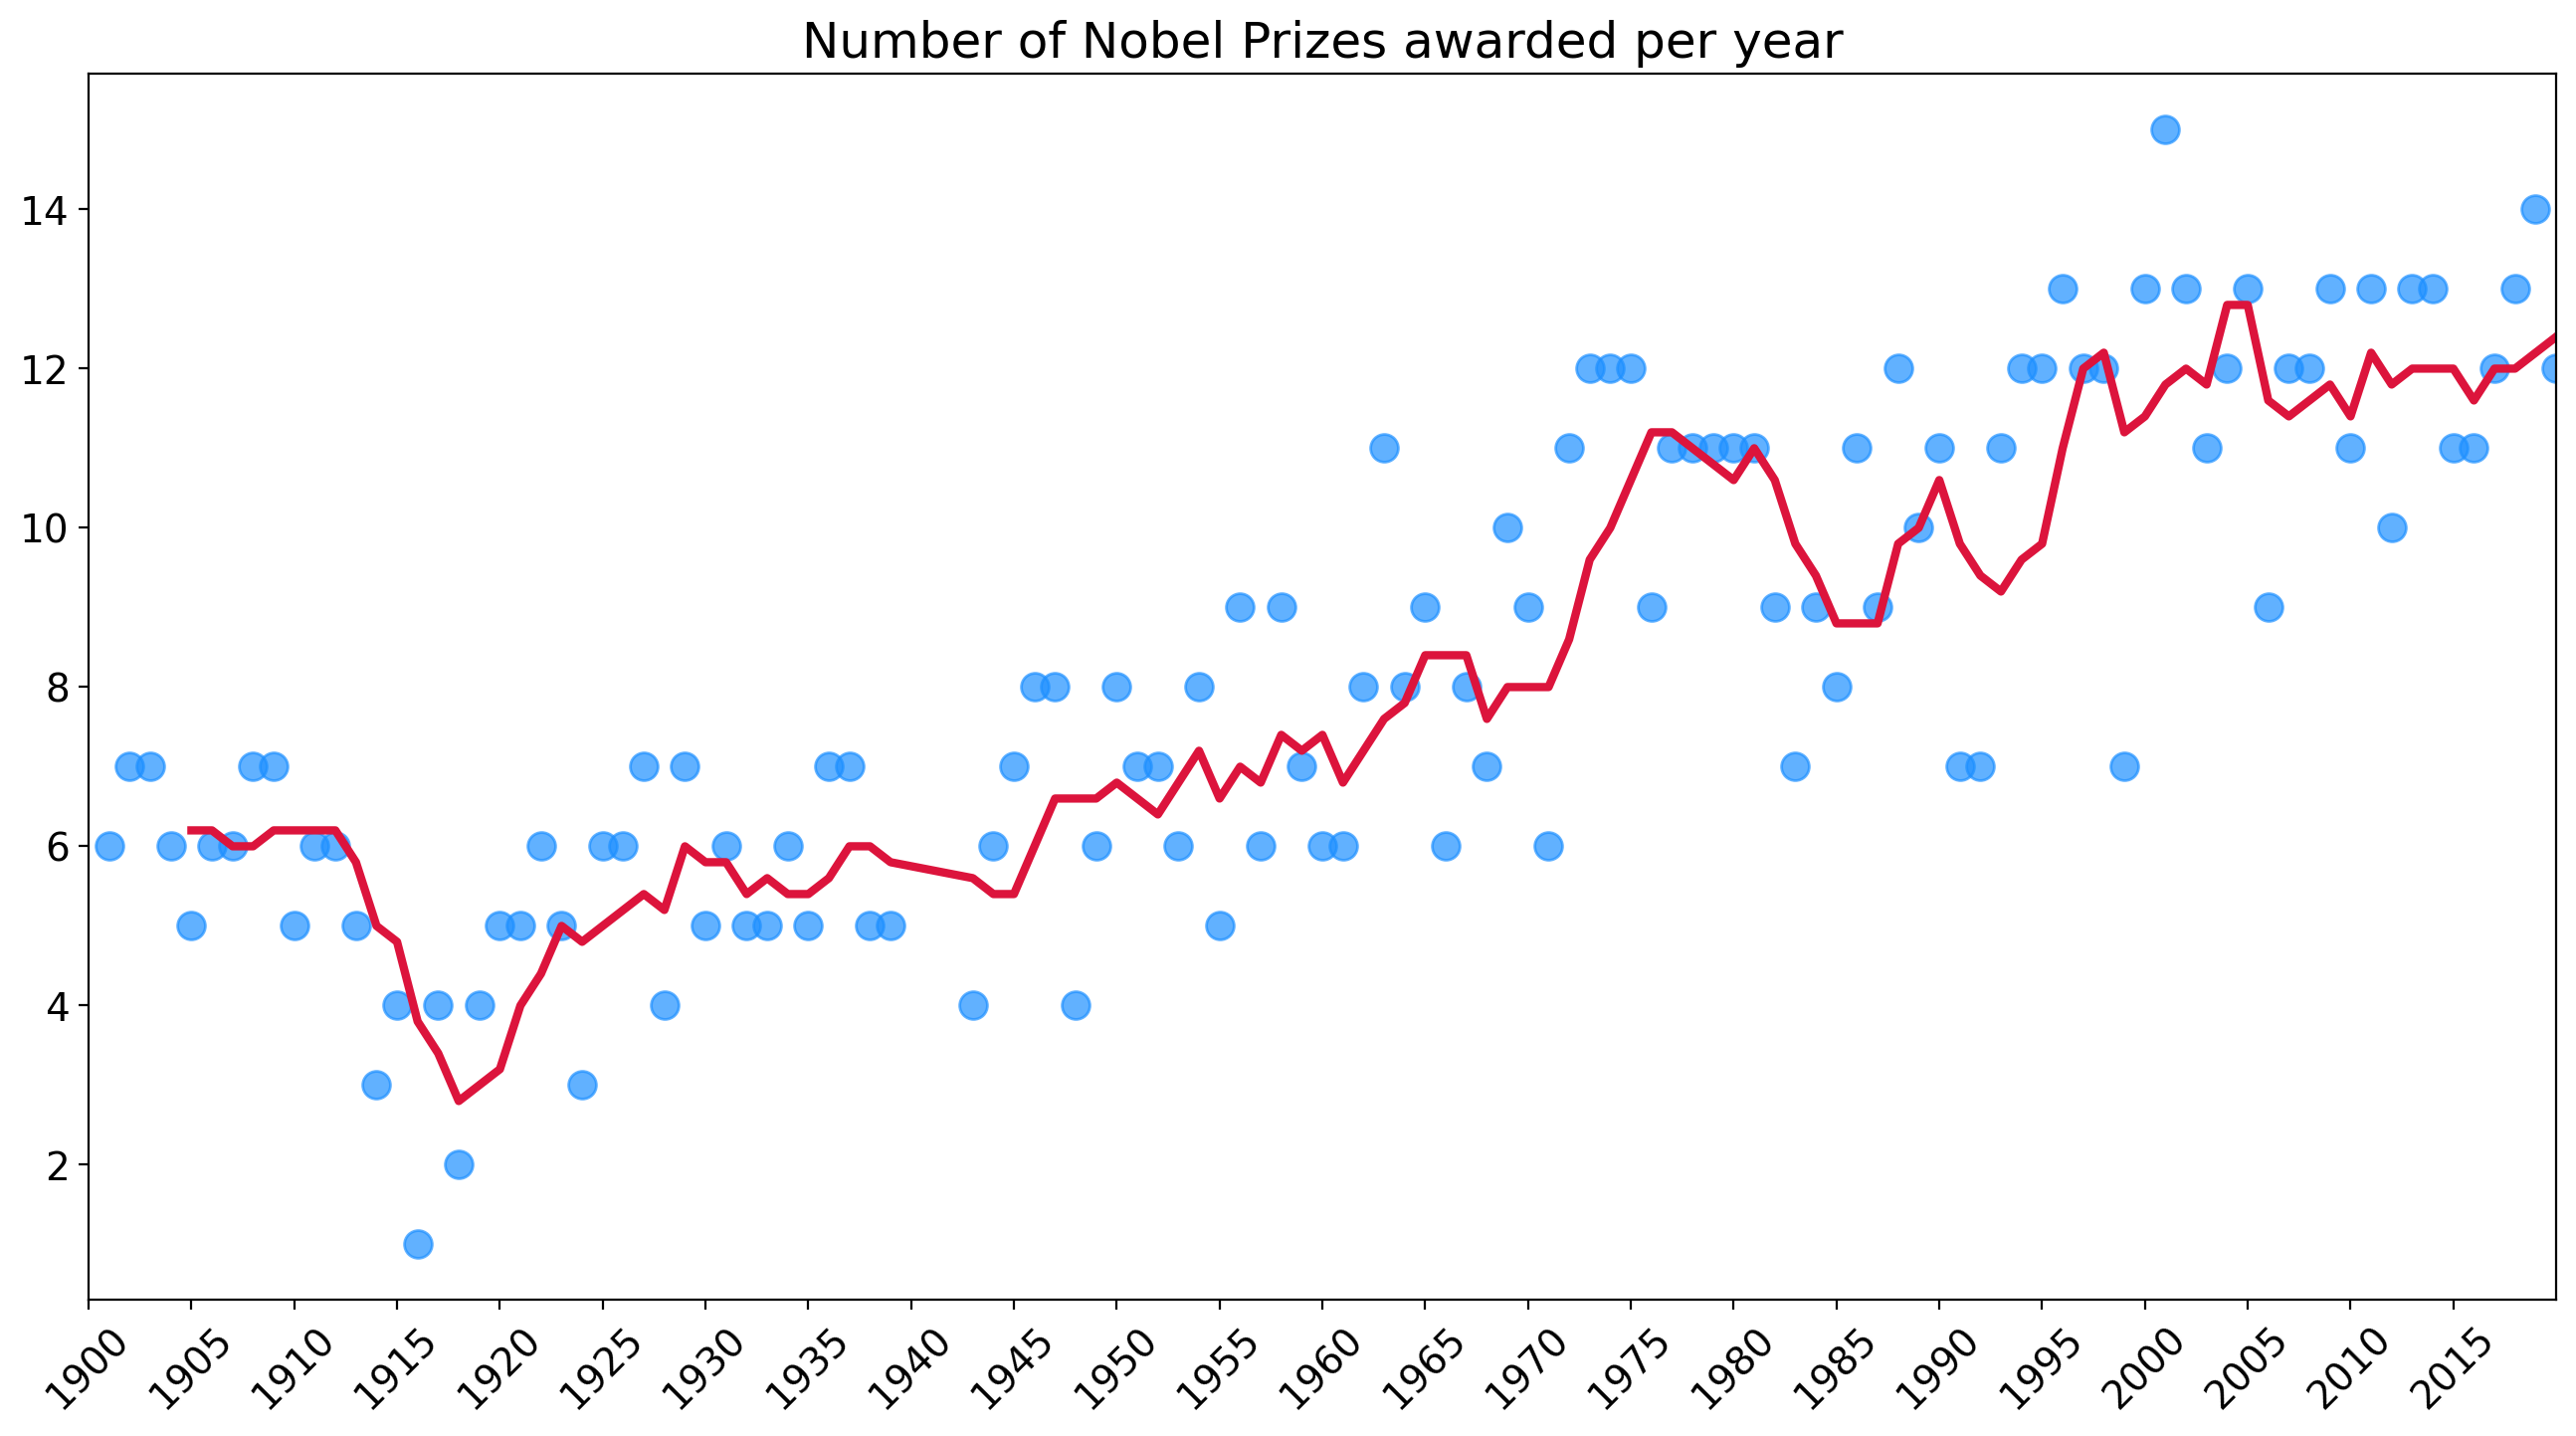

In [32]:
plt.figure(figsize=(16, 8), dpi=200)
plt.title('Number of Nobel Prizes awarded per year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2020, step=5),
           fontsize=14,
           rotation=45)
ax=plt.gca()
ax.set_xlim(1900, 2020)

ax.scatter(x=prize_per_year.index,
            y=prize_per_year.values,
            c='dodgerblue',
            alpha=0.7,
            s=100
            )
ax.plot(prize_per_year.index,
         moving_average.values,
         c='crimson',
        linewidth=3)

plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before.

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart.
* See if you can invert the secondary y-axis to make the relationship even more clear.

In [33]:
avg_prize_share_per_year = df_data.groupby('year')['share_pct'].mean()
avg_prize_share_per_5year = avg_prize_share_per_year.rolling(window=5).mean()

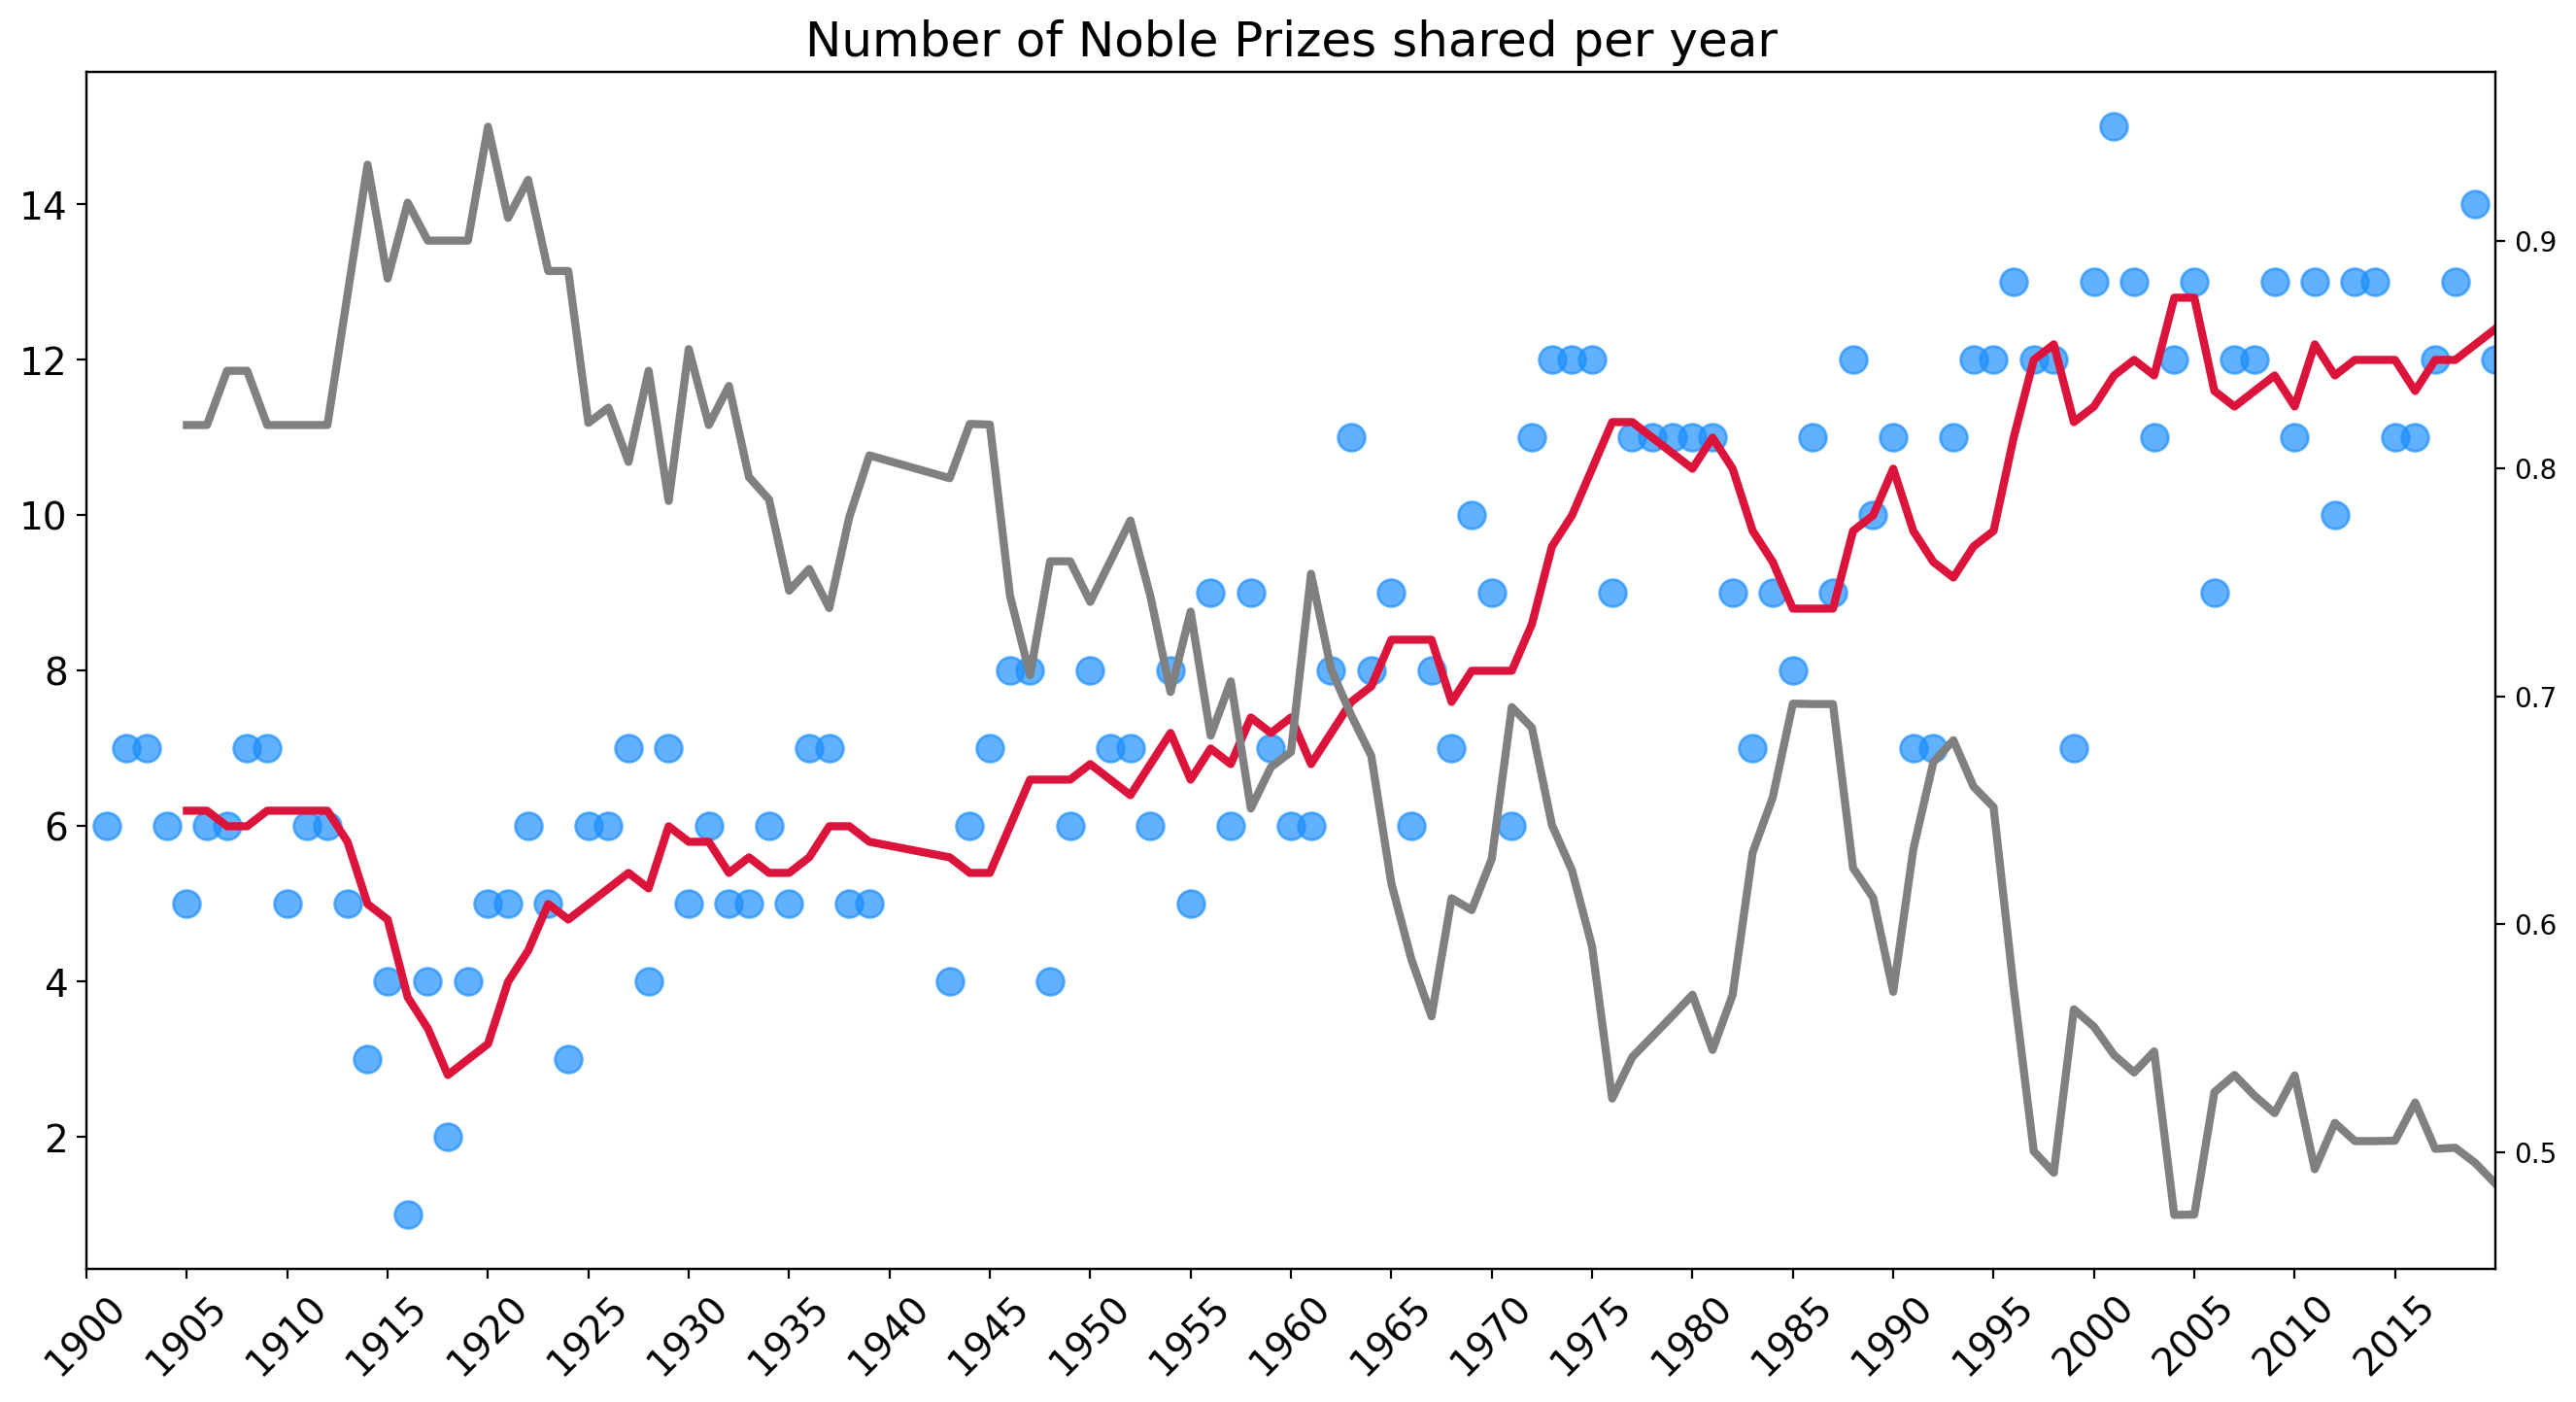

In [34]:
plt.figure(figsize=(16, 8), dpi=200)
plt.title('Number of Noble Prizes shared per year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2020, step=5),
           fontsize=14,
           rotation=45)
ax1=plt.gca()
ax1.set_xlim(1900, 2020)

ax1.scatter(x=prize_per_year.index,
            y=prize_per_year.values,
            c='dodgerblue',
            alpha=0.7,
            s=100
            )
ax1.plot(prize_per_year.index,
         moving_average.values,
         c='crimson',
        linewidth=3)

ax2= ax1.twinx()

ax2.plot(prize_per_year.index,
         avg_prize_share_per_5year.values,
         c='grey',
        linewidth=3)


plt.show()

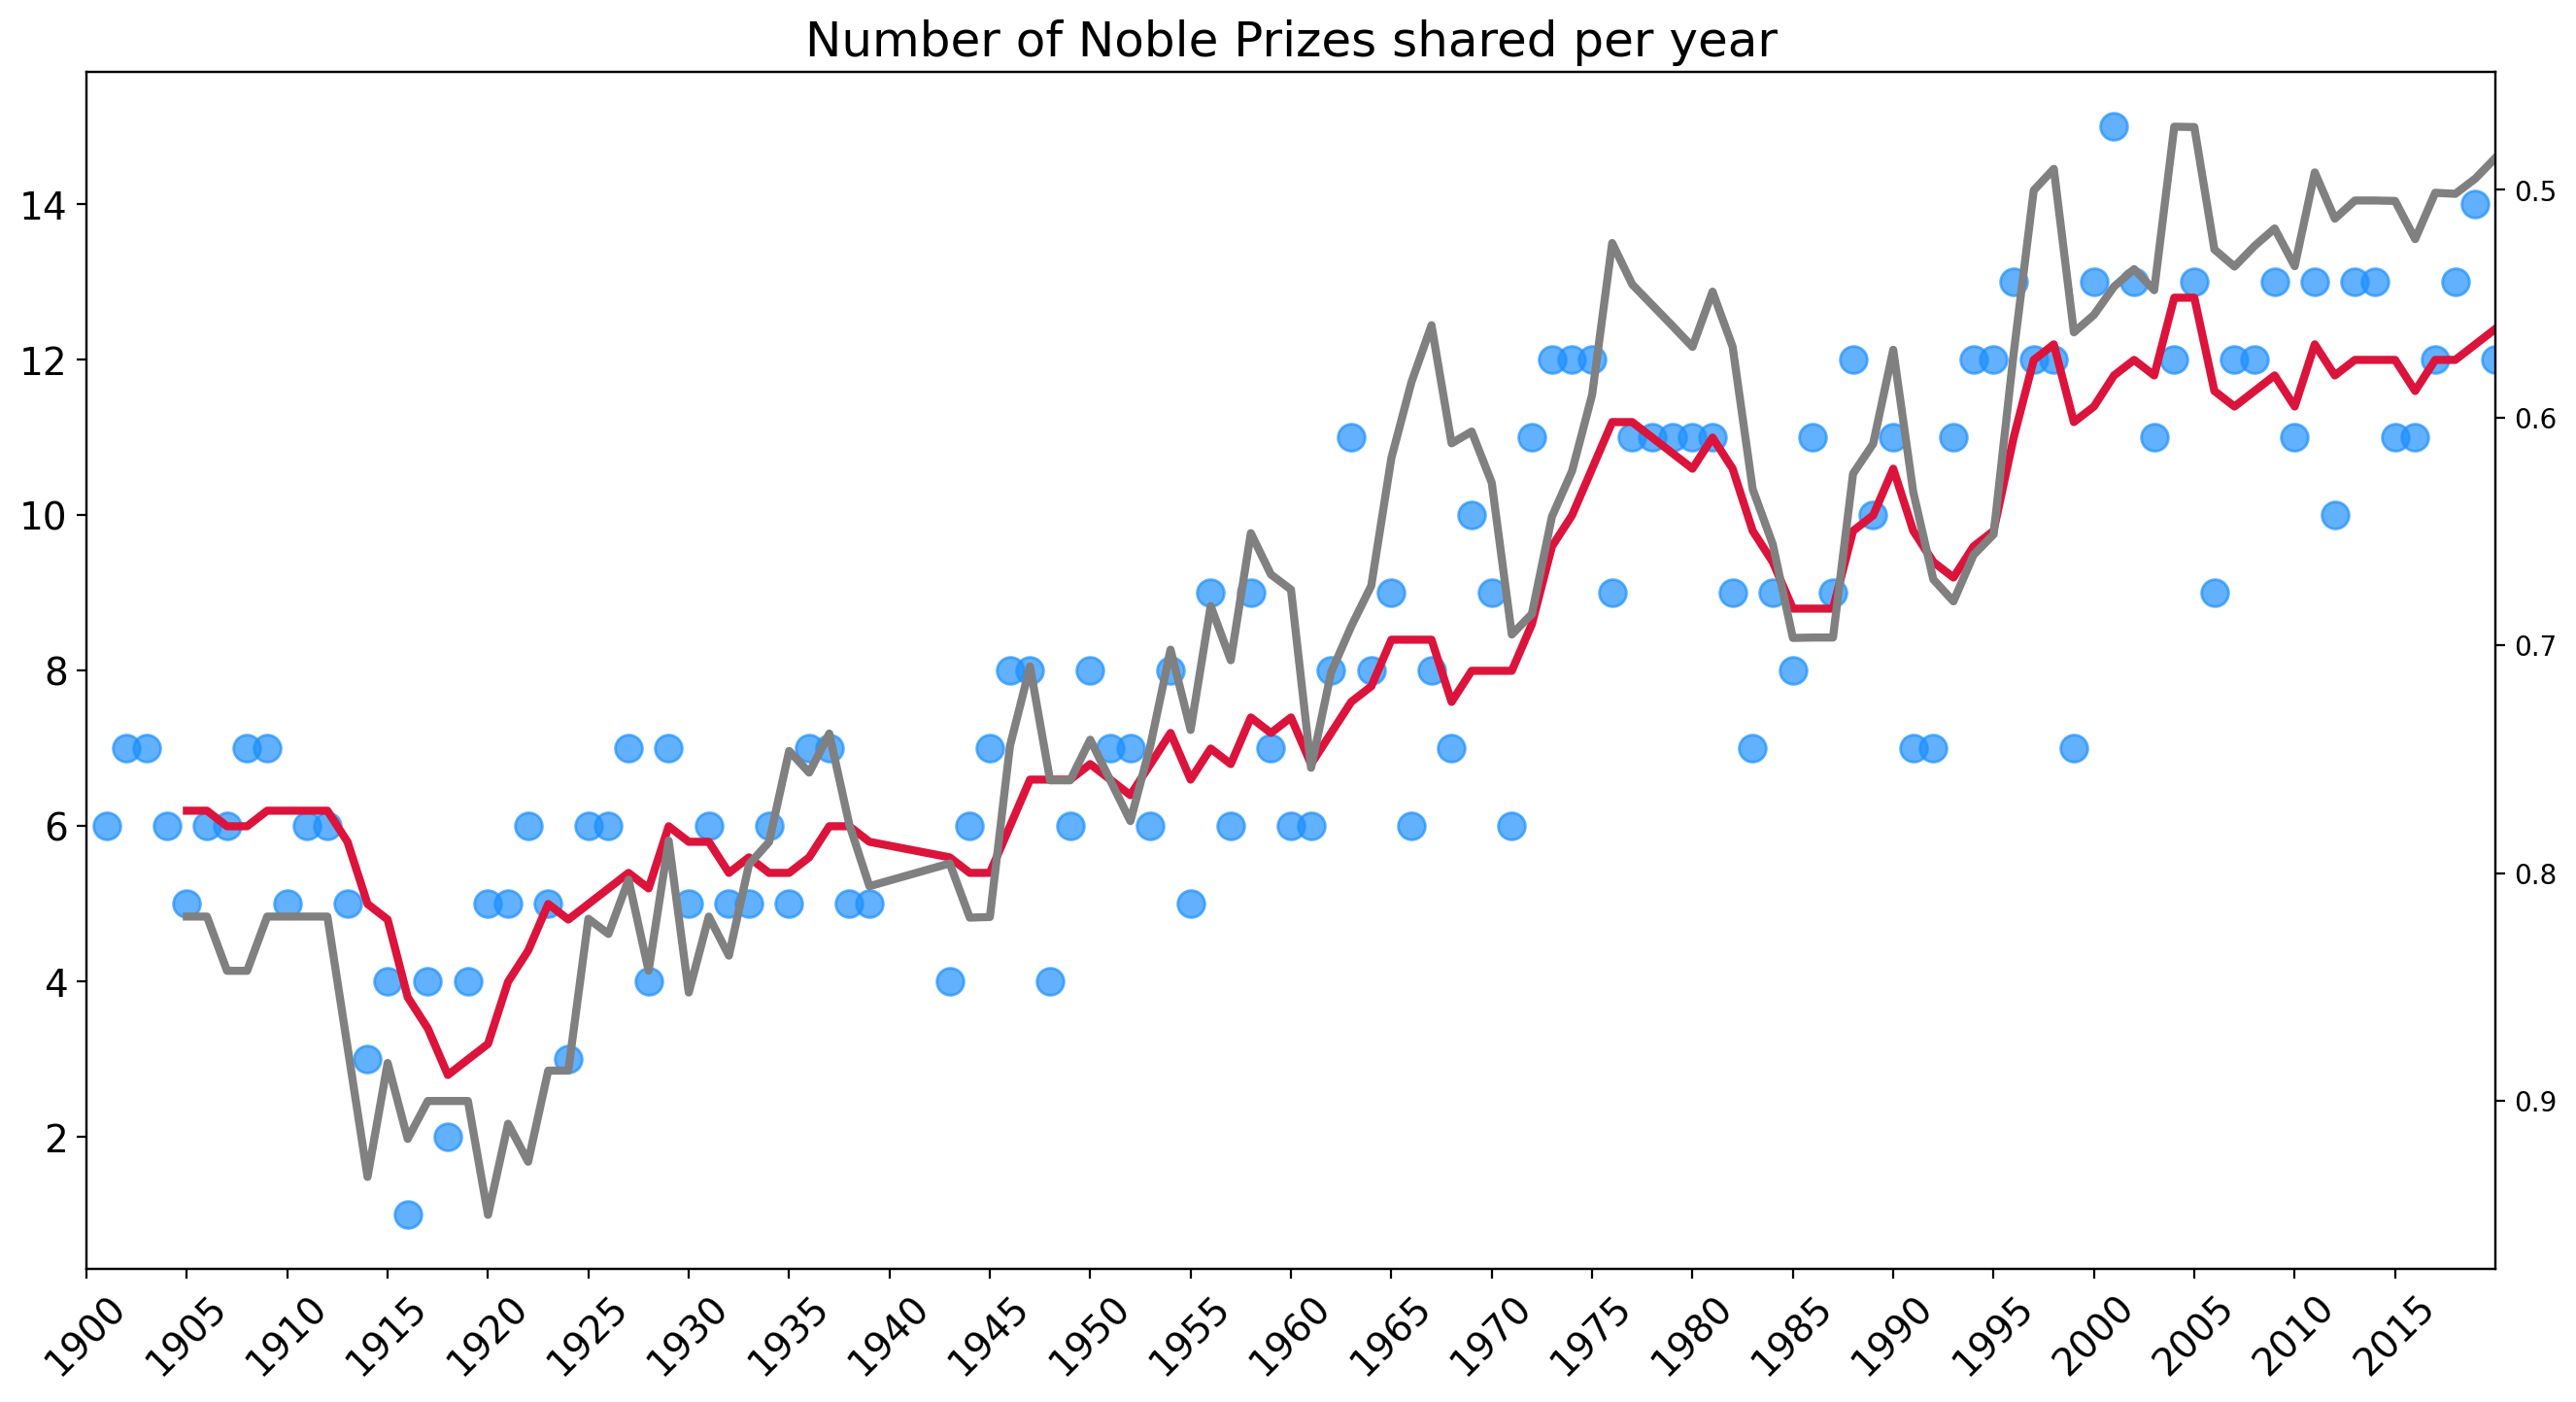

In [35]:
plt.figure(figsize=(16, 8), dpi=200)
plt.title('Number of Noble Prizes shared per year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2020, step=5),
           fontsize=14,
           rotation=45)
ax1=plt.gca()
ax1.set_xlim(1900, 2020)

ax1.scatter(x=prize_per_year.index,
            y=prize_per_year.values,
            c='dodgerblue',
            alpha=0.7,
            s=100
            )

ax1.plot(prize_per_year.index,
         moving_average.values,
         c='crimson',
        linewidth=3)

ax2= ax1.twinx()

ax2.invert_yaxis()

ax2.plot(prize_per_year.index,
         avg_prize_share_per_5year.values,
         c='grey',
        linewidth=3)


plt.show()

# The Countries with the Most Nobel Prizes

**Challenge**:
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won.

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`?
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic?
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [36]:
top20_countries = df_data.groupby(by='birth_country_current').count()['prize'].sort_values(ascending=False).head(20)
top20_countries

,prize
birth_country_current,
United States of America,281
United Kingdom,105
Germany,84
France,57
Sweden,29
Poland,27
Japan,27
Russia,26
Canada,20


In [37]:
bar = px.bar(x=top20_countries.values,
             y=top20_countries.index,
             color=top20_countries.values,
             color_continuous_scale='Aggrnyl',
             title='Top 20 countries by number of prizes'
             )
bar.update_layout(xaxis_title='Number of Prizes',
                  yaxis_title='Country',
                  yaxis=dict(categoryorder='total ascending'))
bar.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.

Hint: You'll need to use a 3 letter country code for each country.


In [38]:
import pycountry

def get_alpha3(country_name):
    try:
        return pycountry.countries.search_fuzzy(country_name)[0].alpha_3
    except:
        return None

df_data['code'] = df_data['birth_country_current'].apply(get_alpha3)

nobel_prize_per_country = df_data.groupby(['birth_country_current', 'code']).count()['prize'].reset_index()
print(nobel_prize_per_country)

       birth_country_current code  prize
0                    Algeria  DZA      2
1                  Argentina  ARG      4
2                  Australia  AUS     10
3                    Austria  AUT     18
4                 Azerbaijan  AZE      1
..                       ...  ...    ...
68  United States of America  USA    281
69                 Venezuela  VEN      1
70                   Vietnam  VNM      1
71                     Yemen  YEM      1
72                  Zimbabwe  ZWE      1

[73 rows x 3 columns]


In [39]:
df = px.data.gapminder().query('year==2007')
fig = px.choropleth(nobel_prize_per_country,
                      locations=nobel_prize_per_country['code'],
                      color=nobel_prize_per_country['prize'],
                      hover_name=nobel_prize_per_country['birth_country_current'],
                      color_continuous_scale='Mint')
fig.show()

# In Which Categories are the Different Countries Winning Prizes?

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart!


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [40]:
category_country = df_data.groupby(by=['birth_country_current', 'category'], as_index=False).agg({'prize':pd.Series.count})
category_country.sort_values(by='prize', ascending=False, inplace=True)
category_country

,birth_country_current,category,prize
204,United States of America,Medicine,78
206,United States of America,Physics,70
201,United States of America,Chemistry,55
202,United States of America,Economics,49
198,United Kingdom,Medicine,28
...,...,...,...
190,Turkey,Chemistry,1
207,Venezuela,Medicine,1
208,Vietnam,Peace,1
209,Yemen,Peace,1


In [41]:
merge_df = pd.merge(category_country, top20_countries, on='birth_country_current')
merge_df.columns = ['birth_country_current', 'category', 'category_prize', 'total_prize']
merge_df.sort_values(by='total_prize', inplace=True)
merge_df

,birth_country_current,category,category_prize,total_prize
60,Belgium,Peace,3,9
55,Hungary,Chemistry,3,9
59,Belgium,Medicine,3,9
99,India,Peace,1,9
106,Hungary,Literature,1,9
...,...,...,...,...
2,United States of America,Chemistry,55,281
9,United States of America,Peace,19,281
0,United States of America,Medicine,78,281
1,United States of America,Physics,70,281


In [42]:
category_country_bar = px.bar(x=merge_df['category_prize'],
                              y=merge_df['birth_country_current'],
                              color=merge_df['category'],
                              orientation='h',
                              title='Top 20 countries by number of prizes and category')
category_country_bar.update_layout(xaxis_title='Number of Prizes',
                                   yaxis_title='Country',
                                   yaxis=dict(categoryorder='total ascending'))
category_country_bar.show()

When did the United States become so dominant?

In [43]:
df_data.columns
col_subset = ['year', 'category', 'prize', 'birth_country_current', 'code']
usa_data = df_data.loc[df_data.code == 'USA'][col_subset]
usa_data['total_prize_per_year'] = usa_data.groupby(by='year')['prize'].transform('count')
usa_data

,year,category,prize,birth_country_current,code,total_prize_per_year
35,1906,Peace,The Nobel Peace Prize 1906,United States of America,USA,1
72,1912,Peace,The Nobel Peace Prize 1912,United States of America,USA,1
79,1914,Chemistry,The Nobel Prize in Chemistry 1914,United States of America,USA,1
95,1919,Peace,The Nobel Peace Prize 1919,United States of America,USA,1
117,1923,Physics,The Nobel Prize in Physics 1923,United States of America,USA,1
...,...,...,...,...,...,...
953,2020,Economics,The Sveriges Riksbank Prize in Economic Scienc...,United States of America,USA,7
954,2020,Literature,The Nobel Prize in Literature 2020,United States of America,USA,7
955,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,United States of America,USA,7
956,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,United States of America,USA,7


In [44]:
five_years_trends = usa_data['total_prize_per_year'].rolling(window=5).mean()

In [45]:
import plotly.graph_objects as go

In [46]:
bar = px.bar(x=usa_data['year'],
              y=usa_data['total_prize_per_year'],
              color=usa_data['category'],
              title='USA: Nobel Prize Awards by Year Over Recent Decades'
              )


# Add the 5-year rolling average line
bar.add_trace(
    go.Scatter(
        x=usa_data['year'],
        y=five_years_trends,
        mode='lines',
        name='5-Year Rolling Average',
        line=dict(color='black', width=2)
    )
)

bar.update_layout(xaxis_title='Year',
                  yaxis_title='Number of Prizes per Year',
                  legend=dict(x=0.01, y=0.99)
                  )

bar.show()

Has the prize become more global in scope?

In [47]:
unique_countries_per_year = df_data.groupby(by='year')['birth_country_current'].nunique()

In [48]:
top20_countries.index

Index(['United States of America', 'United Kingdom', 'Germany', 'France',
       'Sweden', 'Poland', 'Japan', 'Russia', 'Canada', 'Italy', 'Switzerland',
       'Austria', 'Netherlands', 'Norway', 'China', 'Denmark', 'Australia',
       'Belgium', 'Hungary', 'India'],
      dtype='object', name='birth_country_current')

In [49]:
# Example: your list of top countries
top_countries = ['USA', 'GBR', 'DEU', 'FRA']

# Create flag for whether country is a TOP country
df_data['is_top'] = df_data['code'].isin(top_countries)

country_counts = (
    df_data
    .groupby(['year', 'is_top'])
    .size()            # counts rows (each row = one award)
    .unstack(fill_value=0)
)

if True not in country_counts.columns:
  country_counts[True] = 0
if False not in country_counts.columns:
  country_counts[False] = 0

country_counts = country_counts.rename(columns={
    True: 'Top_Countries',
    False: 'Other_Countries'
})

country_counts['Total'] = (
    country_counts['Top_Countries'] + country_counts['Other_Countries']
    )

print(country_counts.tail(10))


is_top  Other_Countries  Top_Countries  Total
year                                         
2011                  7              6     13
2012                  4              6     10
2013                  6              7     13
2014                  8              5     13
2015                  9              2     11
2016                  4              7     11
2017                  3              9     12
2018                  5              8     13
2019                  7              7     14
2020                  1             11     12


In [50]:
country_counts['other_countries_percentage'] = round(country_counts['Other_Countries'] / country_counts['Total'], 2)

In [51]:
bar = px.bar(country_counts,
             x=country_counts.index,
             y=['Top_Countries', 'Other_Countries'],
             title='Nobel Prize: Global Honour or Regional Stronghold?',
             barmode='stack',
                 color_discrete_map={
        'Top_Countries': 'royalblue',    # change to your preferred color
        'Other_Countries': 'orange'      # change to your preferred color
    })

bar.add_trace(
    go.Scatter(
        x=country_counts.index,
        y=country_counts['other_countries_percentage'],
        mode='lines',
        name='Percentage of awards given to Other Countries',
        line=dict(color='grey', width=2),
        yaxis='y2'
    )
)

bar.update_layout(xaxis_title='Year',
                  yaxis=dict(title='Number of Awards'),
                  yaxis2=dict(
                      title='Fraction of Awards to Other Countries',
                      overlaying='y',
                      side='right',
                      range=[0, 1],   # scale 0 to 1 for fraction
                      showgrid=False,
                      tickformat=".0%"  # formats ticks as percentage, e.g. 0%, 50%, 100%
                  ))

bar.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won?
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this.
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line.

In [52]:
prize_by_year = df_data.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]

In [53]:
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current', 'year']).sum().groupby(level=[0]).cumsum()

In [54]:
cumulative_prizes.reset_index(inplace=True)

In [55]:
line_chart = px.line(cumulative_prizes,
                     x='year',
                     y='prize',
                     color='birth_country_current',
                     hover_name='birth_country_current')
line_chart.update_layout(xaxis_title='Year',
                         yaxis_title='Number of Prizes')
line_chart.show()

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [56]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO', 'share_pct', 'code',
       'is_top'],
      dtype='object')

In [57]:
top20_awarded_organisations = df_data['organization_name'].value_counts()[:20]
top20_awarded_organisations.sort_values(ascending=True, inplace=True)

In [58]:
organisation_bar = px.bar(x=top20_awarded_organisations.values,
                          y=top20_awarded_organisations.index,
                          title='Top 20 Research Institutions by Number of Prizes',
                          color=top20_awarded_organisations,
                          orientation='h',
                          color_continuous_scale=px.colors.sequential.haline)

organisation_bar.update_layout(xaxis_title='Number of Prizes',
                               yaxis_title='Name of Institutions',
                               coloraxis_showscale=False)

organisation_bar.show()

# Which Cities Make the Most Discoveries?

Where do major discoveries take place?  

**Challenge**:
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate.
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [59]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO', 'share_pct', 'code',
       'is_top'],
      dtype='object')

In [60]:
top20_awarded_organisation_cities = df_data['organization_city'].value_counts()[:20]
top20_awarded_organisation_cities.sort_values(ascending=True, inplace=True)

In [61]:
top20_awarded_organisation_cities_bar = px.bar(
    top20_awarded_organisation_cities,
    x=top20_awarded_organisation_cities.values,
    y=top20_awarded_organisation_cities.index,
    orientation='h',
    title='Nobel Prize hotspots by cities',
    color=top20_awarded_organisation_cities,
    color_continuous_scale=px.colors.sequential.haline
)
top20_awarded_organisation_cities_bar.update_layout(
    xaxis_title='Number of Prizes',
    yaxis_title='Cities',
    coloraxis_showscale=False
)
top20_awarded_organisation_cities_bar.show()

Which city in Europe has had the most discoveries?

In [62]:
hotspot_without_US = df_data[df_data['organization_country'] != 'United States of America']
hotspot_without_US = hotspot_without_US['organization_city'].value_counts()[:20]
hotspot_without_US.sort_values(ascending=True, inplace=True)

In [63]:
hotspot_without_US_bar = px.bar(
    hotspot_without_US,
    x=hotspot_without_US.values,
    y=hotspot_without_US.index,
    title='Nobel Prize hotspots by Cities excluding USA',
    orientation='h',
    color=top20_awarded_organisation_cities,
    color_continuous_scale=px.colors.sequential.haline
)
hotspot_without_US_bar.update_layout(
    xaxis_title='Number of Prizes',
    yaxis_title='Cities'
)
hotspot_without_US_bar.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities

**Challenge**:
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates.
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York?
* How many Nobel laureates were born in London, Paris and Vienna?
* Out of the top 5 cities, how many are in the United States?


In [64]:
london_laureates = df_data[df_data['birth_city'] == 'London']
print(f'{len(london_laureates)} of Nobel laureates were born in London.')

19 of Nobel laureates were born in London.


In [65]:
paris_laureates = df_data[df_data['birth_city'] == 'Paris']
print(f'{len(paris_laureates)} of Nobel laureates were born in Paris.')

26 of Nobel laureates were born in Paris.


In [66]:
vienna_laureates = df_data[df_data['birth_city'] == 'Vienna']
print(f'{len(vienna_laureates)} of Nobel laureates were born in Vienna.')

14 of Nobel laureates were born in Vienna.


In [67]:
top20_birth_cities = df_data['birth_city'].value_counts()[:20]
top20_birth_cities.sort_values(ascending=True, inplace=True)

In [68]:
top20_birth_cities_bar = px.bar(
    top20_birth_cities,
    x=top20_birth_cities.values,
    y=top20_birth_cities.index,
    title='Nobel Prize Laureates birth cities top 20',
    orientation='h',
    color=top20_birth_cities.values,
    color_continuous_scale=px.colors.sequential.Plasma
)
top20_birth_cities_bar.update_layout(
    xaxis_title='Number of Prizes',
    yaxis_title='Birth Cities of Laureates'
)
top20_birth_cities_bar.show()

In [69]:
top5_birth_cities = top20_birth_cities.tail(5)
top5_birth_cities

,count
birth_city,
"Chicago, IL",12
Vienna,14
London,19
Paris,26
"New York, NY",53


In [70]:
top5_cities_df = top5_birth_cities.reset_index()
top5_cities_df.columns = ['birth_city', 'count']

cities_with_country = pd.merge(top5_cities_df, df_data[['birth_city', 'birth_country']], on='birth_city', how='left')
cities_with_country = cities_with_country.drop_duplicates(subset=['birth_city'])
cities_with_country['is_usa'] = cities_with_country['birth_country'] == 'United States of America'
cities_with_country
print(f"From top 5 Birth cities {cities_with_country['is_usa'].sum()} cities are from USA")

From top 5 Birth cities 2 cities are from USA


In [71]:
us_laureates = df_data[df_data['birth_country'] == 'United States of America']
us_laureates_by_cities = us_laureates['birth_city'].value_counts()
us_laureates_ny = us_laureates[us_laureates['birth_city'] == 'New York, NY'].value_counts()
print(f'The total Nobel laureates from the USA until 2020 is {us_laureates_by_cities.sum()}\nOut of it, {us_laureates_ny.sum()} were born in New York.')

The total Nobel laureates from the USA until 2020 is 281
Out of it, 50 were born in New York.


# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**:

* Create a DataFrame that groups the number of prizes by organisation.
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France?


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [85]:
prizes_by_organizations = df_data.groupby(
    by=['organization_country', 'organization_city', 'organization_name'], as_index=False).agg({'prize': pd.Series.count})

prizes_by_organizations = prizes_by_organizations.sort_values('prize', ascending=False)
prizes_by_organizations.head(5)

,organization_country,organization_city,organization_name,prize
205,United States of America,"Cambridge, MA",Harvard University,29
280,United States of America,"Stanford, CA",Stanford University,23
206,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
209,United States of America,"Chicago, IL",University of Chicago,20
195,United States of America,"Berkeley, CA",University of California,19


In [87]:
fig = px.sunburst(
    prizes_by_organizations,
    path=['organization_country', 'organization_city', 'organization_name'],
    values='prize',
    title='Where do Discoveries Take Place?'
)
fig.update_layout(xaxis_title='Number of Prizes',
                    yaxis_title='City',
                    coloraxis_showscale=False)
fig.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you.



In [89]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO', 'share_pct', 'code',
       'is_top'],
      dtype='object')

In [100]:
df_data['winning_age'] = (df_data['year'] - df_data['birth_date'].dt.year).astype('Int64')

### Who were the oldest and youngest winners?

**Challenge**:
* What are the names of the youngest and oldest Nobel laureate?
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [106]:
youngest_age = df_data['winning_age'].min()
youngest_laureate = df_data.loc[df_data['winning_age'] == youngest_age]
youngest_laureate

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,code,is_top,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,0.50,PAK,False,17


In [107]:
oldest_age = df_data['winning_age'].max()
oldest_laureate = df_data.loc[df_data['winning_age'] == oldest_age]
oldest_laureate

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,code,is_top,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,0.33,DEU,True,97


In [111]:
average_winning_age = round(df_data['winning_age'].mean())
print(f'The average age of winning Nobel Prize is {average_winning_age}')

The average age of winning Nobel Prize is 60


In [115]:
age_75th_percentile = df_data['winning_age'].quantile(0.75)
print(f'75% of laureates are younger than {age_75th_percentile} years old when they receive the prize')

75% of laureates are younger than 69 years old when they receive the prize


In [127]:
df_data['winning_age'].describe()

,winning_age
count,934.00
mean,59.95
std,12.62
min,17.00
25%,51.00
50%,60.00
75%,69.00
max,97.00


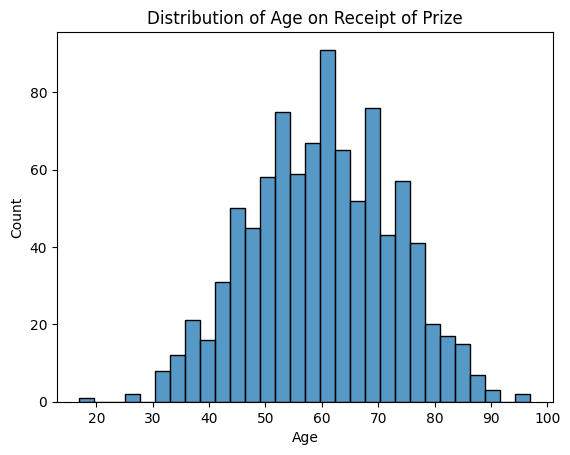

In [128]:
sns.histplot(data=df_data,
             x='winning_age',
             bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award.
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [129]:
df_data['winning_age'].describe()

,winning_age
count,934.00
mean,59.95
std,12.62
min,17.00
25%,51.00
50%,60.00
75%,69.00
max,97.00


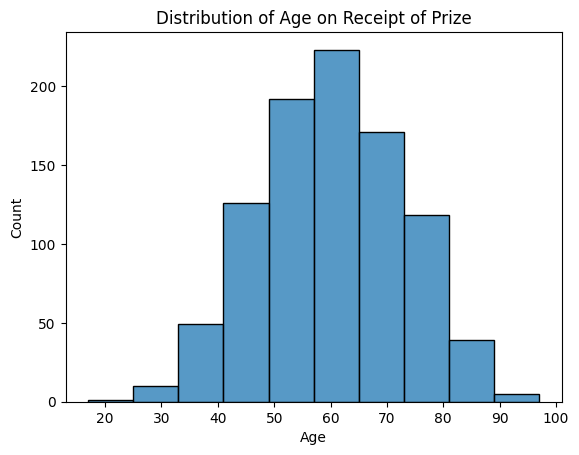

In [132]:
sns.histplot(data=df_data,
             x='winning_age',
             bins=10)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

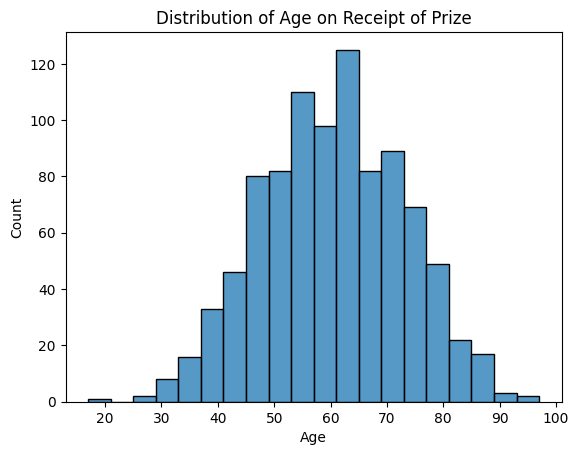

In [131]:
sns.histplot(data=df_data,
             x='winning_age',
             bins=20)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

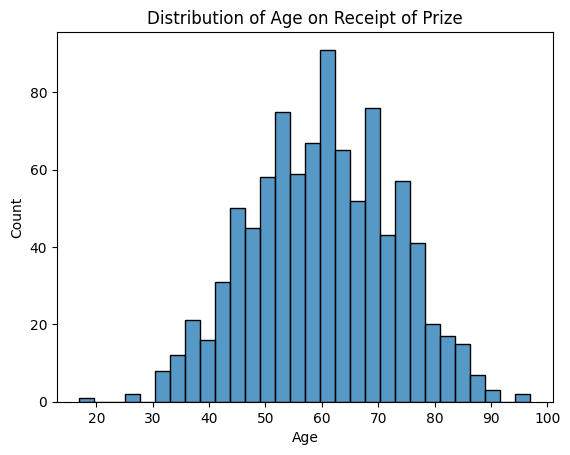

In [130]:
sns.histplot(data=df_data,
             x='winning_age',
             bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

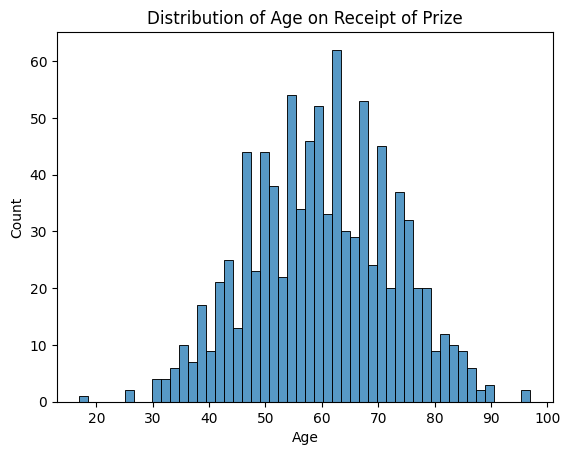

In [140]:
sns.histplot(data=df_data,
             x='winning_age',
             bins=50)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


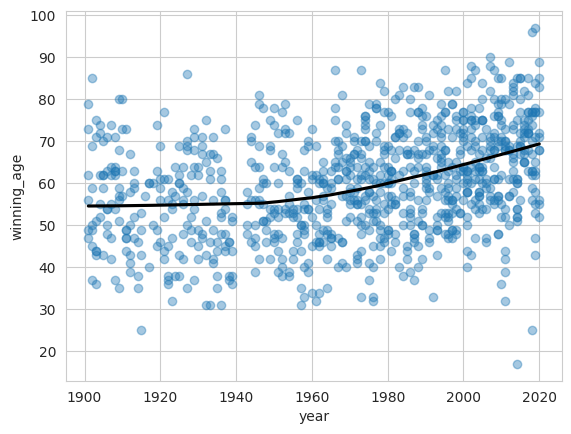

In [142]:
with sns.axes_style('whitegrid'):
  sns.regplot(data=df_data,
              x='year',
              y='winning_age',
              lowess=True,
              scatter_kws = {'alpha':0.4},
              line_kws = {'color': 'black'})
plt.show()


### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category?

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"?
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

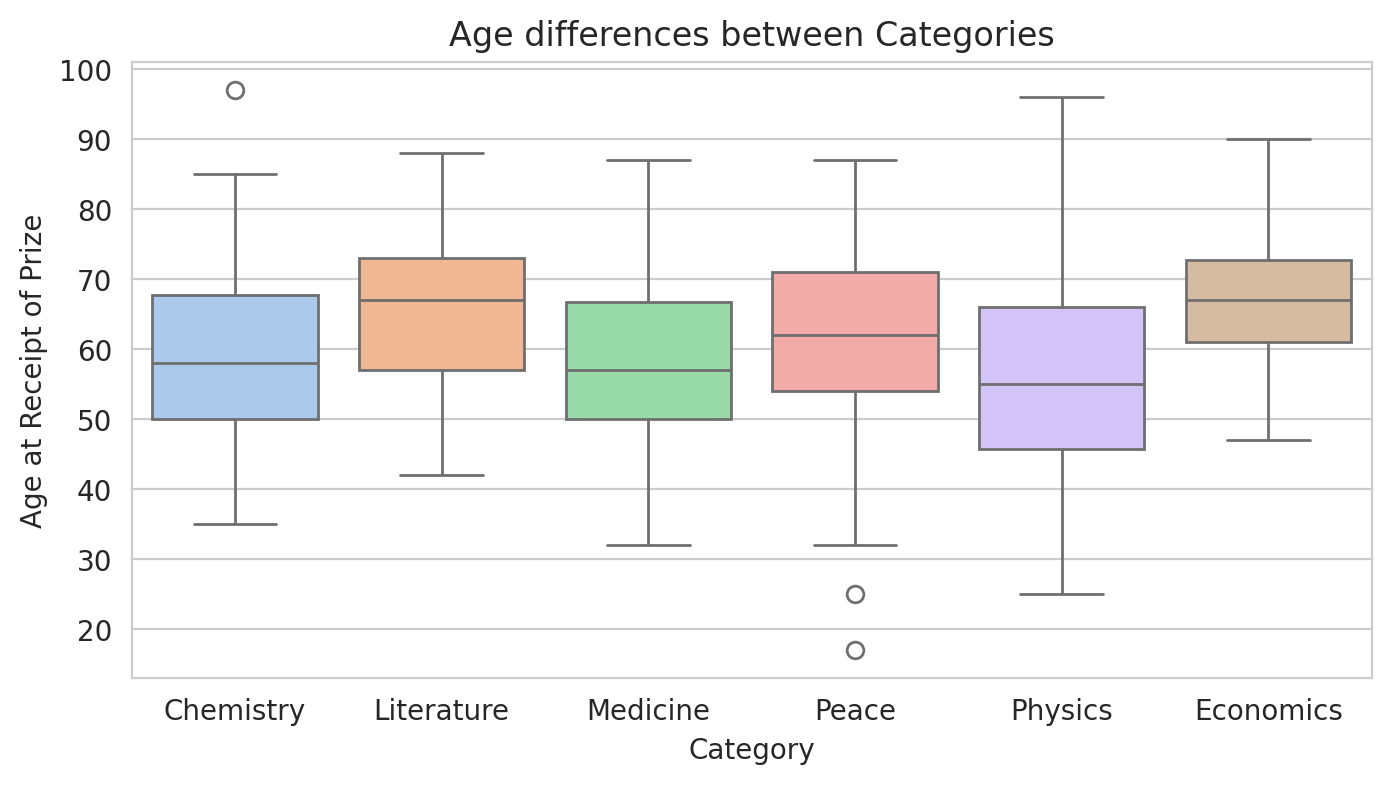

In [151]:
plt.figure(figsize=(8, 4), dpi=200)
sns.set_style('whitegrid')
sns.boxplot(df_data,
            x='category',
            y='winning_age',
            palette='pastel')
plt.xlabel('Category')
plt.ylabel('Age at Receipt of Prize')
plt.title('Age differences between Categories')
plt.show()

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category?
* Which category has the age trending up and which category has the age trending down?
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter.


<Figure size 1600x800 with 0 Axes>

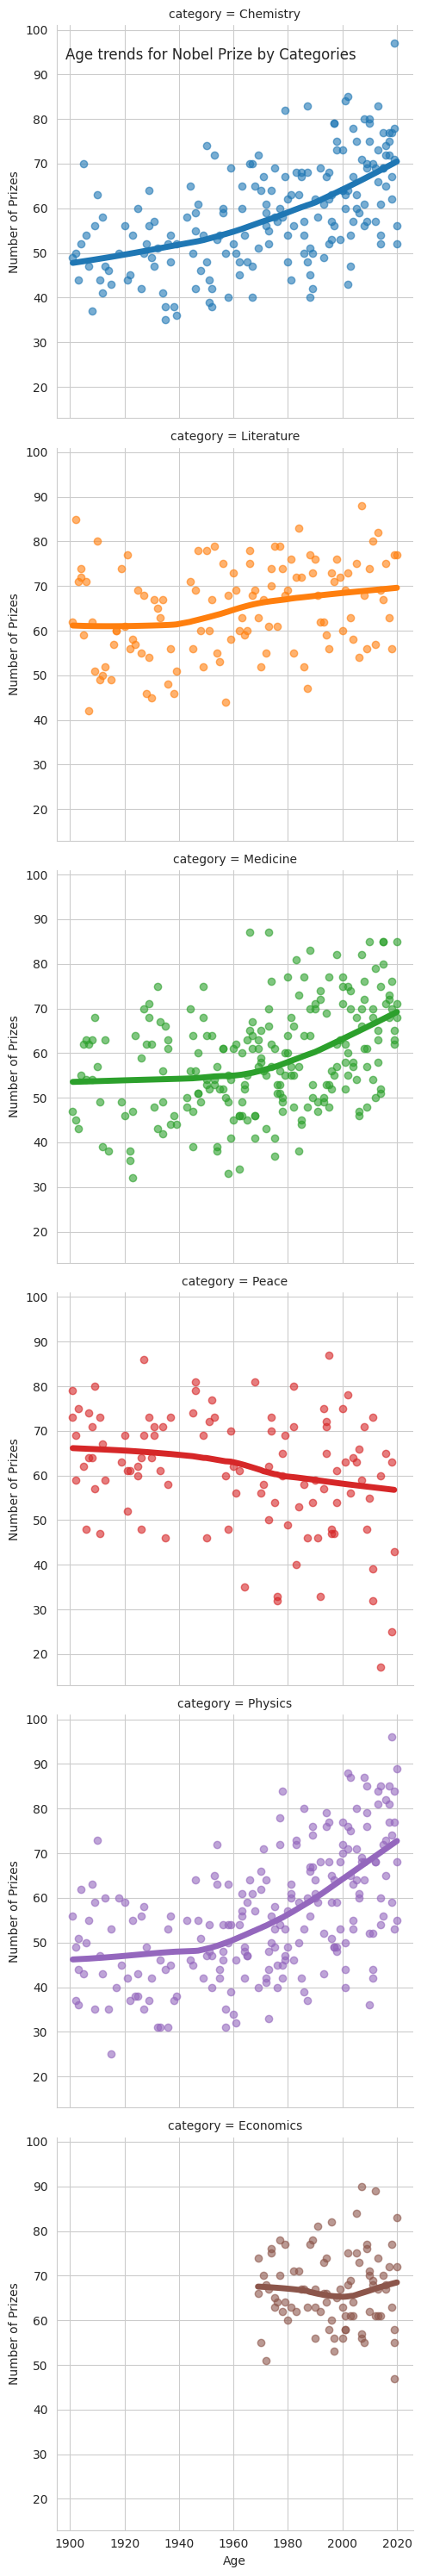

In [170]:
plt.figure(figsize=(8, 4), dpi=200)
sns.set_style('whitegrid')
df_clean = df_data.dropna(subset=['year', 'winning_age'])
charts = sns.lmplot(
    data=df_clean,
    x='year',
    y='winning_age',
    row='category',
    hue='category',
    lowess=True,
    scatter_kws={'alpha': 0.6},
    line_kws={'linewidth': 5})
charts.set_axis_labels('Age', 'Number of Prizes')
charts.fig.suptitle('Age trends for Nobel Prize by Categories')
plt.show()

<Figure size 1600x800 with 0 Axes>

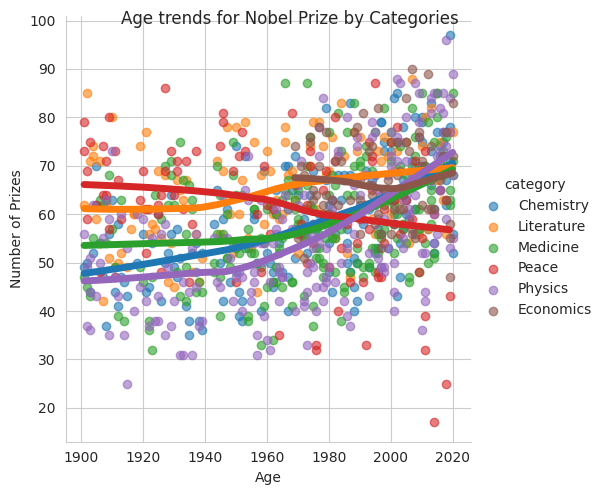

In [171]:
plt.figure(figsize=(8, 4), dpi=200)
sns.set_style('whitegrid')
df_clean = df_data.dropna(subset=['year', 'winning_age'])
charts = sns.lmplot(
    data=df_clean,
    x='year',
    y='winning_age',
    hue='category',
    lowess=True,
    scatter_kws={'alpha': 0.6},
    line_kws={'linewidth': 5})
charts.set_axis_labels('Age', 'Number of Prizes')
charts.fig.suptitle('Age trends for Nobel Prize by Categories')
plt.show()